
# Project Objective: 
Gathering Data from three sources, and assess them assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook

Clean each of the issues you documented while assessing. Perform this cleaning in **wrangle_act.ipynb** as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate)

Store the clean DataFrame(s) in a CSV file with the main one named **twitter_archive_master.csv** .

Analyze and visualize your wrangled data in your **wrangle_act.ipynb Jupyter Notebook**. 
At least **three (3) insights and one (1) visualization** must be produced.

Create a 300-600 word written report called **wrangle_report.pdf or wrangle_report.html** that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called **act_report.pdf or act_report.html** that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

### Final deliverables:
#### 1. **wrangle_act.ipynb**,
#### 2. **twitter_archive_master.csv** 
#### 3. **wrangle_report.pdf**
#### 4. **wrangle_report.html**

### Importing Data and packages

In [1]:
#importing packages
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#importing twitter-archive-enhanced data
twitter_arch = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
#veryfying if data is imported
twitter_arch.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [4]:
# Download the image prediction file using the link provided to Udacity students
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [5]:
#importing image_predictions.tsv file
image = pd.read_csv('image_predictions.tsv',sep='\t')

In [6]:
#veryfying if data is imported
image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [7]:
#importing tweet_json.txt (json file)
tweet_json=pd.read_json('tweet_json.txt',lines=True)

In [8]:
#veryfying if data is imported
tweet_json.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


# Assessing Data
My Goal in this section is to assess three Dataframes (twitter_arch , image , tweet_json) for Quality and Tidiness issues. After analysing in this section I will clean those issues in Cleaning Section

In [9]:
twitter_arch.shape

(2356, 17)

In [10]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
718,783466772167098368,NaN,NaN,2016-10-05 00:40:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He likes eavesdropping from fili...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783466772...,11,10,Finn,None,None,None,None
1369,702332542343577600,NaN,NaN,2016-02-24 03:21:41 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rudy. He's going to be a star. 13/10 t...,NaN,NaN,NaN,https://vine.co/v/irlDujgwOjd,13,10,Rudy,None,None,None,None
942,752917284578922496,NaN,NaN,2016-07-12 17:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Grizzie. She's a semi-submerged Bahrai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752917284...,11,10,Grizzie,None,None,None,None
1650,683515932363329536,NaN,NaN,2016-01-03 05:11:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT...,NaN,NaN,NaN,https://vine.co/v/ibvnzrauFuV,11,10,None,None,None,None,None
1749,679047485189439488,NaN,NaN,2015-12-21 21:15:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog doesn't know how to stairs. Quite tra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679047485...,9,10,None,None,None,None,None


In [12]:
twitter_arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


#### Assessing twitter_arch

In [13]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
#veryfying if tweet ids are unique
twitter_arch["tweet_id"].nunique()

2356

In [16]:
twitter_arch["timestamp"].nunique()

2356

In [17]:
twitter_arch["source"].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [18]:
twitter_arch.text.nunique()

2356

In [19]:
twitter_arch[twitter_arch.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [20]:
twitter_arch[twitter_arch.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [21]:
twitter_arch[twitter_arch.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


> All rows corrsponding to retweet can be deleted as they do not have tweet. these rows just have retweeted information

In [22]:
twitter_arch.expanded_urls.nunique()

2218

In [23]:
twitter_arch.expanded_urls.isnull().sum()

59

In [24]:
twitter_arch.expanded_urls.head()

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

In [25]:
twitter_arch[twitter_arch.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [26]:
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
twitter_arch.rating_numerator.max()

1776

In [28]:
sum(twitter_arch.rating_numerator >20)

24

In [29]:
twitter_arch.rating_denominator.max()

170

In [30]:
twitter_arch[twitter_arch.rating_denominator==170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [31]:
twitter_arch.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [32]:
twitter_arch.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Daisy          7
Toby           7
Bailey         7
Buddy          7
Milo           6
Stanley        6
Dave           6
Oscar          6
Koda           6
Scout          6
Leo            6
Jax            6
Bella          6
Jack           6
Rusty          6
Finn           5
            ... 
Lassie         1
Ralphé         1
Kota           1
Rose           1
Sweets         1
Tug            1
Vixen          1
Holly          1
Charl          1
Skye           1
Jay            1
Philippe       1
old            1
Mosby          1
Luther         1
Eleanor        1
Brian          1
Bones          1
Naphaniel      1
Ambrose        1
Grey           1
Dale           1
Dunkin         1
Gunner         1
Mo             1
Snoop          1
Henry          1
Cal           

In [33]:
twitter_arch[twitter_arch.name.str.islower()]["name"]

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2335            an
2345        

# Notes for Understanding
### 2356 rows and 17 columns
- tweet_id                      :Unique Tweet id
- in_reply_to_status_id         :78 Non Null - Will delete this column
- in_reply_to_user_id           :78 Non Null - Will delete this column
- timestamp                     :time of tweet - unique
- source                        :Source of Tweet (Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck)
- text                          :text of tweet
- retweeted_status_id           :181 Non Null - Will delete this column
- retweeted_status_user_id      :181 Non Null - Will delete this column
- retweeted_status_timestamp    :181 Non Null - Will delete this column
- expanded_urls                 : Tweet Url
- rating_numerator              :Rating for dogs (min = 0, max= 1776)
- rating_denominator            :Rating out of (min = 0, max = 170)
- name                          :Given Name of Dog
- doggo                         :Dog stage (Adult)
- floofer                       :Dog stage (fluffy)
- pupper                        :Dog stage (young)
- puppo                         :Dog stage (transitioning from young to adult)

In [34]:
twitter_arch.duplicated().sum()

0

In [35]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

twitter_arch have 2356 rows and 17 columns. This dataset does not have any duplicate columns, Although some columns do have null values in them. In this data I am going to focus on some cleaning issues as given below:

1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have null values, but these columns just have retweet and reply information which I do not need in Analysis so I will delete rows corresponding to this columns.
2. Delete columns from above point.
3. Some rating_numerator are very high values so I will cleam them
4. Standardize rating_denominator to 10.
5. Change datatype of timeStamp
6. Changing Datatype of tweet_id
7. clean dog name column - dog name have many non-dog name such as such', 'a','quite','quite','not','one','incredibly', etc and are in lower case
8. Source Type has weblink. I am going to extract source type from this column


### Assessing Image Dataframe

In [36]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
image.duplicated().sum()

0

In [39]:
image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [40]:
image.duplicated().sum()

0

In [41]:
len(image.query('p1_dog == False or p2_dog == False or p3_dog == False'))

832

#### Delet rows in image where prediction doest not match to dog

- tweet_id: unique tweet identifier
- jpg_url: image of the dog
- img_num: number out of 4 possible images (most are 1)
- p1: the algorithm's first prediction for the image in the tweet
- p1_conf: is how confident the algorithm is in its first prediction
- p1_dog: is whether or not the first prediction is a breed of dog
- p2: the algorithm's second most likely prediction
- p3: the algorithm's third most likely prediction

In [42]:
image.duplicated().sum()

0

Image Data Frame has 2075 rows and 12 columns. It does not have any duplicate or null values in it.
1. In this Dataframe my goal is to delete rows where predections does not match with dog in all the three algorithims
2. Image, Update p1, p2, p3 to title text and remove underscores

In [43]:
tweet_json.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
449,NaN,NaN,2017-01-10 02:30:30,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Seamus. He's very bad a...,NaN,...,0.0,NaN,NaN,NaN,24069,False,{'created_at': 'Mon Dec 12 16:16:49 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
342,NaN,NaN,2017-02-16 01:34:34,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 769940407350362112, 'id_str'...",0,False,RT @dog_rates: This is Klein. These pics were ...,NaN,...,0.0,NaN,NaN,NaN,11131,False,{'created_at': 'Sun Aug 28 16:51:16 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2097,NaN,NaN,2015-11-28 21:34:09,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670717326967205888, 'id_str'...",1301,False,*screams for a little bit and then crumples to...,NaN,...,0.0,NaN,NaN,NaN,547,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1491,NaN,NaN,2016-01-28 16:53:37,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 692752274041507842, 'id_str'...",7496,False,"""Hello yes could I get one pupper to go please...",NaN,...,0.0,NaN,NaN,NaN,4124,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1623,NaN,NaN,2016-01-06 20:16:44,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,38551,False,This little fella really hates stairs. Prefers...,NaN,...,0.0,NaN,NaN,NaN,24514,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [44]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

### Keeping columns that are required. I am doing it here to make this dataframe more assessible. If I need any column I will come back and include here again. 

### 1. cleaning step - including only columns required for analysis using dataframe

In [45]:
tweet_jason_clean = tweet_json[['id','favorite_count','retweet_count']]

In [46]:
tweet_jason_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [47]:
tweet_jason_clean.shape

(2354, 3)

In [48]:
tweet_jason_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [49]:
tweet_jason_clean.id.nunique()

2354

- id: unique tweet identifier
- retweet_count: number of retweets a tweet received
- favorite_count: number of favorites a tweets received


In [50]:
tweet_json.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [51]:
tweet_json.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

## Tidiness - Messy Data Untidy
1. doggo, floofer, pupper, puppo must make one column
2. Merge three dataframe together to make one dataFrame and extract it to .CSV file format

## Quality
1. First Cleaning Step was already performed on Tweet_json to include only Columns required for Analysis. I am going to keep this step as iterative and include column later if required
2. Datatypes of rating_numerator must be float as some of the rating in decimal. I will make denominator-rating also float
3. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have null values, and these columns just have retweet and reply information which I do not need in Analysis so I will delete rows corresponding to this columns.
4. Making Twitter_arch Dataframe well structred by deleting columns for which rows are deleted in point 1.
5. Twitter_arch - convert timestamp to datetime object as it may be required for Timeseries Analysis 
5. Changing Datatype of tweet_id to str in all Dataframes
7. There is unexpected High values in numerator (1776)
8. Values in Denominatorand denominator is more than 10. Standardize rating_denominator to 10.
9. in Twitter archieve clean source link to extract source
10. clean dog name column - dog name have many non-dog name such as such', 'a','quite','quite','not','one','incredibly', etc and are in lower case
11. Image, Update p1, p2, p3 to title text and remove underscores
12. image_predictions, Remove non-dogs, the 324 rows where p1, p2, and p3 are false




# Cleaning
#### In this Step I am going to Clean and resolve the issues identified in Assessing Phase

In [52]:
# Copying twitter_arch to twitter_arch_clean
twitter_arch_clean = twitter_arch.copy()
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## 2. changing rating_numerator, rating_denominator to float using astype()
#### In this step using .astype('float'), I am going to convert datatype of rating_numerator and rating_denominator from int to float

### code

In [53]:
twitter_arch_clean[["rating_numerator","rating_denominator"]] = twitter_arch_clean[["rating_numerator","rating_denominator"]].astype('float')

### Test


In [54]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(6), int64(1)

## 3. Changing Datatype of timestamp using astype(''datetime64[ns])
### This is required for time series analysis. So using as.type('datetime64[ns]') I will convert datatype to date time format

### Code

In [55]:
twitter_arch_clean["timestamp"] = twitter_arch_clean["timestamp"].astype('datetime64[ns]')


In [56]:
twitter_arch_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14.0,10.0,such,None,None,None,None


### Test

In [57]:
twitter_arch_clean["timestamp"].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

## 4. Changing Datatype of tweet_id
#### In this step using .astype('str'), I am going to convert datatype of tweet_id from int to string

### Code

In [58]:
twitter_arch_clean["tweet_id"] = twitter_arch_clean["tweet_id"].astype('str')

### Test

In [59]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

# 5. Deleting Retweed rows using drop function in pandas
#### As mentioned earlier in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have null values, and these columns just have retweet and reply information which I do not need in Analysis so I will delete rows corresponding to this columns.

I will drop rows corresponding to this column using idea to drop rows where values are not null

### Code

In [60]:
twitter_arch_clean.drop(twitter_arch_clean[twitter_arch_clean.retweeted_status_id.notnull()].index, inplace=True)


In [61]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1)

### Iterating Assessing to see if I can delete rows baseed on in_reply_to_status_id
Below assessing shows that we can delet rows where in_reply_to_status_id is not null as on digging into it I fins out that they are just repy to tweet and does not have any information regarding dog rating. only One dog "Tessa" is present in not null columns.
So I am deleting rows where in_reply_to_status_id is not null

In [62]:
twitter_arch_clean[twitter_arch_clean.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None


In [63]:
twitter_arch_clean[twitter_arch_clean.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12.0,10.0,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17.0,10.0,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14.0,10.0,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10.0,10.0,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12.0,10.0,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14.0,10.0,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12.0,10.0,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14.0,10.0,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14.0,10.0,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420.0,10.0,None,None,None,None,None


In [64]:
twitter_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


# 6. Deleting  replied rows using drop function in pandas
#### These rows does not have real tweet info, so we can delete them. As done above here also I will drop rows corresponding to this column using idea to drop rows where values are not null

### Code

In [65]:
twitter_arch_clean.drop(twitter_arch_clean[twitter_arch_clean.in_reply_to_status_id.notnull()].index, inplace=True)


### Test

In [66]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null float64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), 

# 7. I am going to delete Columns - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
#### As these Columns are null, so it make more sense to delet them from Dataframe. Using .drop function in Pnadas I will delete them

In [67]:
twitter_arch_clean=twitter_arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis =1)

In [68]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 213.0+ KB


# 8. Cleaning Dog name column and converting to Title case
#### dog name have many non-dog name such as such', 'a','quite','quite','not','one','incredibly', etc. most of them are in lower case. So I am going to use .str.isloer() function to grab all these lower case name and replace them with null using np.nan. As most of the non-dog name are in lower case so this method will work very well. Secondly, the names also have None in them, which I will replace with np.nan too. Thirdly there is a dog name O, in text I found visually that it must be "O'Malley", so I will do replace it here. Finally I will change all name to Title case


In [69]:
mask = twitter_arch_clean.name.str.islower()
column_name = 'name'
twitter_arch_clean.loc[mask, column_name] = np.nan

In [70]:
# Replace all 'None's with a NaN
twitter_arch_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

In [71]:
# Replace the name 'O' with "O'Malley" 
twitter_arch_clean['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

In [72]:
# Convert names to title case
twitter_arch_clean.name = twitter_arch_clean.name.str.title()

In [73]:
twitter_arch_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


# 9. Extracting Source Type from Source using str.extract
#### Extracting different sources can hep us in analyse what is the most used source by users. Using .str.extract a function of pandas I am going to achieve it

### Code


In [74]:
twitter_arch_clean['source'] = twitter_arch_clean['source'].str.extract(r'>(.+)<',expand=True)

### Test

In [75]:
twitter_arch_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [76]:
twitter_arch_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

# 10. In Image dataframe the some names start with lower case and some have upper case. Visually I have seen that some name have "_", "-" abd " " in them
#### so I am going to standardize them by replacing "-" and " " with "_" and converting them to Title case

In [77]:
image_clean = image.copy()

In [78]:
image_clean.head()
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Code

In [79]:
image_clean[['p1','p2','p3']] = image_clean[['p1','p2','p3']].applymap(str.title)
image_clean[['p1','p2','p3']] = image_clean[['p1','p2','p3']].replace(' ','_').replace('-','_')

### Test

In [80]:
image_clean[['p1','p2','p3']].sample(10)

,p1,p2,p3
342,Ostrich,Arabian_Camel,Llama
499,Pomeranian,Chow,Pekinese
1275,Saluki,Borzoi,Labrador_Retriever
1471,Sundial,Cash_Machine,Maze
1891,Fountain,American_Black_Bear,Sundial
1528,Chihuahua,Pekinese,Pembroke
620,Lakeland_Terrier,West_Highland_White_Terrier,Norwich_Terrier
143,Crash_Helmet,Toaster,Mouse
276,Shih-Tzu,Lhasa,Guinea_Pig
1845,Border_Terrier,Brabancon_Griffon,Yorkshire_Terrier


# 11 image_predictions, Remove non-dogs, the 324 rows where p1, p2, and p3 are false
#### in this step using query function, I will only import the rows where all three predction predict that the picture is of dog only

### Code

In [81]:
len(image_clean.query('p1_dog == False & p2_dog == False & p3_dog == False'))

324

In [82]:
image_clean = image_clean.query('p1_dog == True or p2_dog == True or p3_dog == True')

### test

In [83]:
len(image_clean.query('p1_dog == False & p2_dog == False & p3_dog == False'))

0

## 12. Changing name of id to tweet_id and changing Datatype of tweet_id using astype('str') in tweet_json Dataframe and changing Datatype of tweet_id using astype('str') in image_clean Dataframe
#### As i have to combine all dataframe together, so I will change the datatype of it to string using .astype('str')

## code

In [84]:
image_clean["tweet_id"] = image_clean["tweet_id"].astype('str')

In [85]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null object
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB


In [86]:
tweet_jason_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [88]:
tweet_jason_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [89]:
tweet_jason_clean["tweet_id"] = tweet_jason_clean["tweet_id"].astype('str')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
tweet_jason_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [91]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  1390 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 213.0+ KB


# 13 Cleaning Numerator and denominator ratings

#### 1. First, I will extract all rating from the text column using Regex
#### 2. Second  I assume the rating benchmark to be 20. So, First, I will extract rating_numerator and text column to see the mismatch in ratings and if mismatch is there I will replace ratings in numerator_rating with rating from text
#### 3.  I will also replace very high ratings such as 1776, 666 with median of ratings
### 4.  I will also replace Null values with mean rating
#### 5. I will change rating_denominator to 10. This will standardrize it

In [92]:
twitter_arch_clean = twitter_arch_clean.copy()

### Code

In [93]:

twitter_arch_clean['rating_numerator'],twitter_arch_clean['rating_denominator'] = twitter_arch_clean['text'].str.extract(r'([0-9]+\.?[0-9]*\/[0-9]+0)',expand=True)[0].str.split("/",1).str


twitter_arch_clean['rating_numerator'] = twitter_arch_clean['rating_numerator'].astype(float)
twitter_arch_clean['rating_denominator'] = twitter_arch_clean['rating_denominator'].astype(float)

In [94]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(twitter_arch_clean[twitter_arch_clean['rating_numerator']>20][['tweet_id','text','rating_numerator']])

,tweet_id,text,rating_numerator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0


313,433,902,1120	1202,1228,1254,1274,1351,1433,1634,1635,1779,1843,

In [95]:
twitter_arch_clean.loc[313,'rating_numerator'] = 13.00
twitter_arch_clean.loc[433,'rating_numerator'] = 8.40
twitter_arch_clean.loc[902,'rating_numerator'] = 11.00
twitter_arch_clean.loc[1120,'rating_numerator'] = 12.00
twitter_arch_clean.loc[1202,'rating_numerator'] = 11.00
twitter_arch_clean.loc[1228,'rating_numerator'] = 11.00
twitter_arch_clean.loc[1254,'rating_numerator'] = 10.00
twitter_arch_clean.loc[1274,'rating_numerator'] = 9.00
twitter_arch_clean.loc[1351,'rating_numerator'] = 12.00
twitter_arch_clean.loc[1433,'rating_numerator'] = 11.00
twitter_arch_clean.loc[1634,'rating_numerator'] = 11.00
twitter_arch_clean.loc[1635,'rating_numerator'] = 11.00
twitter_arch_clean.loc[1779,'rating_numerator'] = 12.00
twitter_arch_clean.loc[1843,'rating_numerator'] = 11.00
    
    

In [96]:
twitter_arch_clean['rating_numerator'].median()

11.0

replacing 188,189,290,342,979,2074 with median

In [97]:
twitter_arch_clean.loc[188,'rating_numerator'] =twitter_arch_clean['rating_numerator'].median()
twitter_arch_clean.loc[189,'rating_numerator']=twitter_arch_clean['rating_numerator'].median()
twitter_arch_clean.loc[290,'rating_numerator']=twitter_arch_clean['rating_numerator'].median()
twitter_arch_clean.loc[342,'rating_numerator']=twitter_arch_clean['rating_numerator'].median()
twitter_arch_clean.loc[979,'rating_numerator']=twitter_arch_clean['rating_numerator'].median()
twitter_arch_clean.loc[2074,'rating_numerator']=twitter_arch_clean['rating_numerator'].median()

### Test

In [98]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(twitter_arch_clean[twitter_arch_clean['rating_numerator']>20][['tweet_id','text','rating_numerator']])

,tweet_id,text,rating_numerator


In [99]:
twitter_arch_clean[twitter_arch_clean['rating_numerator'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,None,None,None,None


### Code

In [100]:
#replacing null value with mean
twitter_arch_clean.loc[516,'rating_numerator']=twitter_arch_clean['rating_numerator'].median()

### Test

In [101]:
twitter_arch_clean[twitter_arch_clean['rating_numerator'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [102]:
len(twitter_arch_clean[twitter_arch_clean['rating_numerator']>20]) 

0

In [103]:
twitter_arch_clean.rating_denominator.unique()

array([  10.,   70.,   nan,  150.,  170.,   20.,   50.,   90.,   80.,
         40.,  110.,  120.])

In [104]:
twitter_arch_clean.rating_denominator =10
twitter_arch_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2131,670086499208155136,2015-11-27 03:47:25,Twitter for iPhone,"""Hi yes this is dog. I can't help with that s-...",https://twitter.com/dog_rates/status/670086499...,10.0,10,NaN,None,None,None,None
788,774314403806253056,2016-09-09 18:31:54,Twitter for iPhone,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...,https://twitter.com/dog_rates/status/774314403...,14.0,10,NaN,None,None,None,None
2023,671896809300709376,2015-12-02 03:40:57,Twitter for iPhone,This is Lola. She fell asleep on a piece of pi...,https://twitter.com/dog_rates/status/671896809...,10.0,10,Lola,None,None,None,None
1021,746726898085036033,2016-06-25 15:29:00,Twitter for iPhone,Meet Abby. She's incredibly distracting. Just ...,https://twitter.com/dog_rates/status/746726898...,12.0,10,Abby,None,None,None,None
894,759197388317847553,2016-07-30 01:22:17,Twitter for iPhone,This is Luna. She's just heckin precious af I ...,https://twitter.com/dog_rates/status/759197388...,12.0,10,Luna,None,None,None,None


Define: Combine dog stage columns (doggo, floofer, pupper, puppo) into one 'dog_stage' column. Delete the
separate dog stage categories after visually inspecting a random sample to ensure the combination worked
accurately. Convert entries in this column title case.


## Tidiness - Messy Data Untidy
#### In this section I will work on Two tidiness Isuues that I identified in Assessing proccess
1. doggo, floofer, pupper, puppo must make one column - Varioable Stage in 4 Columns
2. Merge three dataframe together to make one dataFrame and extract it to .CSV file format

### 1. doggo, floofer, pupper, puppo must make one column - Varioable Stage in 4 Columns
1. Combine stage columns (doggo, floofer, pupper, puppo) into one 'stage' column. Delete the
separate dog stage categories after visually inspecting a random sample to ensure the combination worked
accurately


### Code

In [105]:
# making one column for all
twitter_arch_clean['stage'] = twitter_arch_clean['doggo']+twitter_arch_clean['floofer']+twitter_arch_clean['pupper']+twitter_arch_clean['puppo']
twitter_arch_clean['stage'] = twitter_arch_clean['stage'].str.replace('None','')
twitter_arch_clean = twitter_arch_clean.replace(({'stage':{'':np.nan}}))
twitter_arch_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

### Test 

In [106]:
twitter_arch_clean['stage'].value_counts()

pupper          221
doggo            72
puppo            23
floofer           9
doggopupper       9
doggofloofer      1
doggopuppo        1
Name: stage, dtype: int64

## 2. Merge three dataframe together to make one dataFrame and extract it to .CSV file format
### Merging all Three DataFrame into 1 DataFrame. In this I am going to merge twitter_arch_clean and image_clean based on Inner join and lastly merge tweet_jason_clean based on left join on tweet-id

### Code

In [107]:
twitter_archive_master = pd.merge(twitter_arch_clean,image_clean,how='inner',on='tweet_id').merge(tweet_jason_clean,how='left',on='tweet_id')

### Test

In [108]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 22 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null int64
name                  1186 non-null object
stage                 257 non-null object
jpg_url               1666 non-null object
img_num               1666 non-null int64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null bool
p2                    1666 non-null object
p2_conf               1666 non-null float64
p2_dog                1666 non-null bool
p3                    1666 non-null object
p3_conf               1666 non-null float64
p3_dog                1666 non-null bool
favorite_count        1666 non

In [109]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
780,724046343203856385,2016-04-24 01:24:35,Twitter for iPhone,This is Sarge. Not even he knows what his tong...,https://twitter.com/dog_rates/status/724046343...,10.0,10,Sarge,NaN,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,...,0.826272,True,Bull_Mastiff,0.158595,True,Great_Dane,0.011859,True,2901,620
442,788412144018661376,2016-10-18 16:11:17,Twitter for iPhone,This is Dexter. He breaks hearts for a living....,https://twitter.com/dog_rates/status/788412144...,11.0,10,Dexter,NaN,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,...,0.805238,True,Labrador_Retriever,0.113798,True,Brittany_Spaniel,0.038559,True,16060,5990
502,776218204058357768,2016-09-15 00:36:55,Twitter for iPhone,Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13.0,10,NaN,floofer,https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg,...,0.940326,True,Pomeranian,0.055527,True,Keeshond,0.002226,True,33345,18497
619,752519690950500352,2016-07-11 15:07:30,Twitter for iPhone,Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11.0,10,NaN,puppo,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,...,0.999984,False,Labrador_Retriever,0.000010,True,Eskimo_Dog,0.000001,True,8157,3917
1235,678334497360859136,2015-12-19 22:02:01,Twitter for iPhone,This is Rosie. She has a snazzy bow tie and a ...,https://twitter.com/dog_rates/status/678334497...,10.0,10,Rosie,NaN,https://pbs.twimg.com/media/CWntoDVWcAEl3NB.jpg,...,0.378643,True,Golden_Retriever,0.095594,True,Kelpie,0.085309,True,1427,304


In [110]:
#Importing CSV file named - twitter_archive_master.csv
twitter_archive_master.to_csv('twitter_archive_master.csv')


## -------------------------------------------------------------------------------------------------------------------------------


# Analysis and Visualization

In [111]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 22 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null int64
name                  1186 non-null object
stage                 257 non-null object
jpg_url               1666 non-null object
img_num               1666 non-null int64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null bool
p2                    1666 non-null object
p2_conf               1666 non-null float64
p2_dog                1666 non-null bool
p3                    1666 non-null object
p3_conf               1666 non-null float64
p3_dog                1666 non-null bool
favorite_count        1666 non

## 1. Most used Source Type

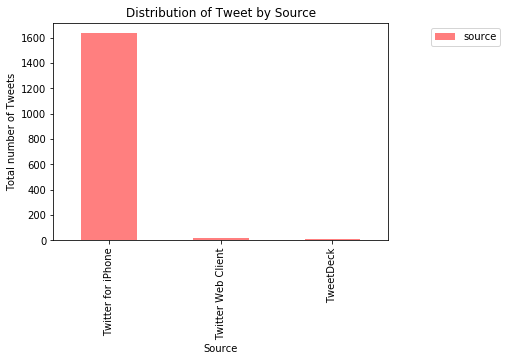

In [112]:
ax=twitter_archive_master['source'].value_counts().plot(kind='bar',color="red",alpha=.5)
ax.set_title("Distribution of Tweet by Source")
ax.set_xlabel("Source")
ax.set_ylabel("Total number of Tweets")
ax.legend(bbox_to_anchor=(1.35, 1));

In [113]:
twitter_archive_master['source'].value_counts()

Twitter for iPhone    1635
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

### Twitter is the most used source for Tweeting to rate dods in this dataset

## 2. Most common Name

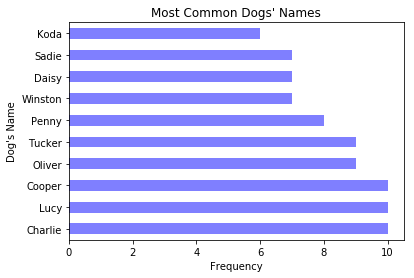

In [114]:
# rank the names frequency in a descending order
ax = twitter_archive_master.name.value_counts().sort_values(ascending =False)[:10].plot('barh',color="blue",alpha=.5)
ax.set_title("Most Common Dogs' Names")
ax.set_xlabel('Frequency')
ax.set_ylabel("Dog's Name");

### Lucy, Cooper, Charlie are the most used names for dog

## 3. Most rate dog with highest Number of favourite count and retweet count

In [115]:
twitter_archive_master['rating_numerator'].value_counts().sort_values(ascending = False)

12.00    423
10.00    360
11.00    359
13.00    221
9.00     133
8.00      68
7.00      31
14.00     22
6.00      16
5.00      13
4.00       7
3.00       5
2.00       2
11.26      1
9.75       1
11.27      1
0.00       1
13.50      1
8.40       1
Name: rating_numerator, dtype: int64

In [116]:
highest_rating = twitter_archive_master[twitter_archive_master['rating_numerator']==14.00]

In [117]:
len(highest_rating)

22

In [118]:
highest_rating[highest_rating.retweet_count==highest_rating.retweet_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
296,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10,Bo,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,...,0.351308,True,Toy_Poodle,0.271929,True,Tibetan_Terrier,0.094759,True,95450,42228


In [119]:
highest_rating[highest_rating.favorite_count==highest_rating.favorite_count.max()][["p1","p2","p3"]]

,p1,p2,p3
296,Standard_Poodle,Toy_Poodle,Tibetan_Terrier


In [120]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg",width=400, height=400)
#https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o

### Dog Named Bo which seems to be Standard Poddle is one of the highest rated dog, but with highest Retweet and and favourite count of 42228, 95450 rescpectively
https://www.traditionsvetcenters.com/services/dogs/breeds/standard-poodle

## 4. Most Tweeted Day to rate dogs

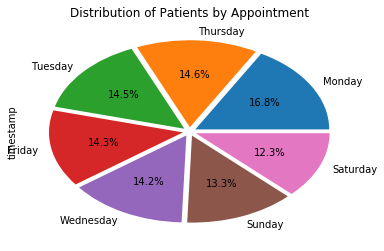

In [121]:
ax=twitter_archive_master.timestamp.dt.weekday_name.value_counts().plot.pie(explode = (0.05,0.05,0.05,0.05,0.05,0.05,.05),autopct='%1.1f%%');
ax.set_title("Distribution of Patients by Appointment");

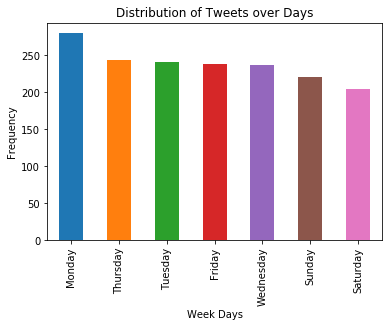

In [122]:
twitter_archive_master.timestamp.dt.weekday_name.value_counts().plot('bar')
plt.title("Distribution of Tweets over Days")
plt.xlabel('Week Days')
plt.ylabel('Frequency');

#### On Monday People Tweeted the most

## 5. Most Tweeted Month to rate dogs

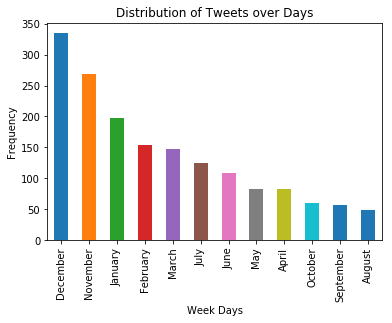

In [123]:
twitter_archive_master.timestamp.dt.month_name().value_counts().plot('bar')
plt.title("Distribution of Tweets over Days")
plt.xlabel('Week Days')
plt.ylabel('Frequency');

### December is the most Tweeted mont. I assume people are in the festive mood, so they visit this page to refresh. And it interesting to note that Summer and Fall is the least tweeted season, I think people usually go out on this day and does not spend much time on twitter


## 6. Favourite vs Retweet over the time

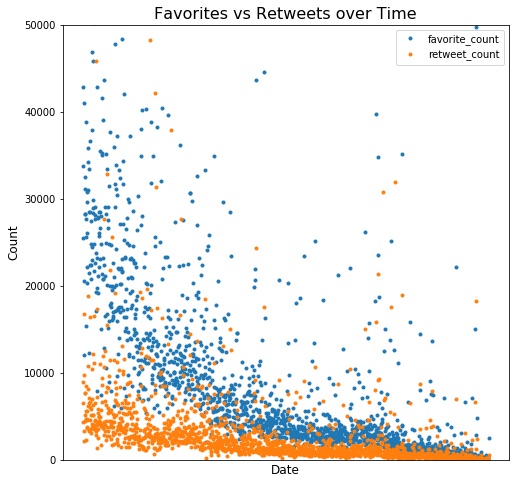

In [127]:
twitter_archive_master[['favorite_count', 'retweet_count']].plot(style =
'.', ylim=[0, 50000], figsize=(8,8))
plt.title('Favorites vs Retweets over Time', size=16)
plt.xlabel('Date', size=12)
plt.xticks([], [])
plt.ylabel('Count', size=12)
plt.legend(ncol=1, loc='upper right');


### Favorites are more popular than retweets. Both decreasing over time, and retweets even more so.

## 7. Rating vs Retweet Count


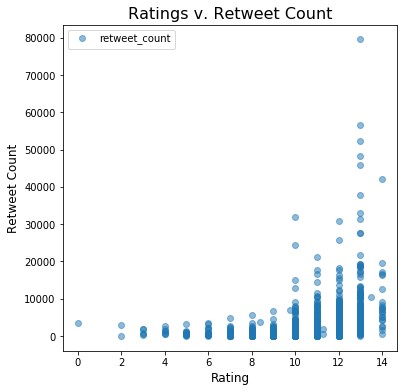

In [125]:
ax = twitter_archive_master.plot(x = 'rating_numerator', y = 'retweet_count', style =
'o', alpha=.5, figsize=(6,6));
ax.set_title('Ratings v. Retweet Count', size=16)
ax.set_xlabel('Rating', size=12)
ax.set_ylabel('Retweet Count', size=12);

### Higher rated dogs have more retweets.

## 8. Rating Distribution

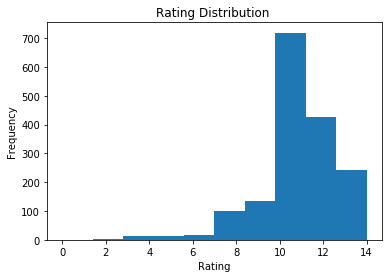

In [126]:
plt.hist(twitter_archive_master.rating_numerator)
plt.title("Rating Distribution ")
plt.xlabel("Rating")
plt.ylabel("Frequency");

### Most of the ratings are between 10 and 11